In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('task/train_set/x_train_aggregated.csv') # Replace with your file path
y_df = pd.read_csv('task/train_set/y_train.csv')
# df['Fraudster'] = y_df['Fraudster']
# Display the first few rows
print(df.head())

# Check the distribution of the target variable (Fraudster)
# print(df['Fraudster'].value_counts())

     AccountID  NumTransactions      AvgAmount   MaxAmount      TotalIn  \
0  C0001143040              562  146658.532989  3585064.01  35124031.74   
1  C0001332727              178  128888.997753   903276.53  13396604.25   
2  C0002641069               56  146342.356786  2571512.49   4547603.60   
3  C0002967890              103  117303.432330  3554689.54   3016367.57   
4  C0003513711               50  144333.040800  1563406.66   4462829.33   

       MaxIn     TotalOut  MaxCashOut  MaxDebit  MaxTransfer  MaxPayment  \
0  424498.32  47298063.80   284531.00   8893.26   3585064.01    27070.99   
1  341238.53   9545637.35   258056.33      0.00    903276.53    21396.14   
2  293992.40   3647568.38   204095.40   3594.16   2571512.49    14710.21   
3  392633.82   9065885.96   247445.60  23100.20   3554689.54    24640.16   
4  264727.14   2753822.71   142728.98   3080.34   1563406.66    16098.56   

   MaxFreqH  MaxFreqD  
0        12        84  
1         6        33  
2         2         

In [6]:
y_df.head()

,AccountID,Fraudster
0,C4133222161,0
1,C8665070455,0
2,C9148601312,0
3,C1221811177,0
4,C5209415529,0


In [7]:
xy_train = pd.merge(df, y_df, on='AccountID', how='inner')

In [24]:
xy_train.describe()

,NumTransactions,AvgAmount,MaxAmount,TotalIn,MaxIn,TotalOut,MaxCashOut,MaxDebit,MaxTransfer,MaxPayment,MaxFreqH,MaxFreqD,Fraudster
count,11061.000000,1.106100e+04,1.106100e+04,1.106100e+04,1.106100e+04,1.106100e+04,1.106100e+04,11061.000000,1.106100e+04,11061.000000,11061.000000,11061.000000,11061.000000
mean,173.268421,1.454351e+05,1.866861e+06,1.042735e+07,3.393609e+05,1.227517e+07,2.308254e+05,5364.761463,1.815955e+06,19479.734623,5.223488,28.436037,0.157129
std,1122.199246,6.548711e+04,1.318804e+06,2.292905e+07,5.875693e+05,2.354127e+07,1.153758e+05,7669.151693,1.290086e+06,7948.617402,17.342272,176.490148,0.363938
min,1.000000,4.407557e+03,8.437110e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000
25%,39.000000,1.196196e+05,8.641564e+05,2.128583e+06,2.599915e+05,2.558064e+06,1.981320e+05,0.000000,8.604498e+05,15773.650000,2.000000,7.000000,0.000000
50%,99.000000,1.387191e+05,1.780288e+06,6.165977e+06,3.080791e+05,8.088935e+06,2.453406e+05,3058.480000,1.776725e+06,20428.490000,4.000000,17.000000,0.000000
75%,215.000000,1.561108e+05,2.625486e+06,1.351976e+07,3.534323e+05,1.671086e+07,2.800967e+05,7951.330000,2.616498e+06,24225.720000,6.000000,35.000000,0.000000
max,77542.000000,1.804926e+06,1.705500e+07,1.392348e+09,1.705500e+07,1.400163e+09,4.008213e+06,162019.560000,1.206550e+07,78382.870000,1206.000000,12265.000000,1.000000


In [9]:
# Check for missing values
print(xy_train.isnull().sum())

# If there are missing values, handle them (e.g., fill with mean/median or drop)
# df = df.fillna(df.median())

# Separate features (X) and target (y)
X = xy_train.drop(columns=['Fraudster', 'AccountID'])  # Drop non-feature columns
y = xy_train['Fraudster']

# Scale numerical features (optional but recommended for some algorithms)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

AccountID          0
NumTransactions    0
AvgAmount          0
MaxAmount          0
TotalIn            0
MaxIn              0
TotalOut           0
MaxCashOut         0
MaxDebit           0
MaxTransfer        0
MaxPayment         0
MaxFreqH           0
MaxFreqD           0
Fraudster          0
dtype: int64


In [10]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = xy_train[xy_train['Fraudster'] == 0]
df_minority = xy_train[xy_train['Fraudster'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  # Sample without replacement
                                   n_samples=len(df_minority),  # Match minority class size
                                   random_state=42)  # For reproducibility

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Check the new distribution
print(df_downsampled['Fraudster'].value_counts())

Fraudster
0    1738
1    1738
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_downsampled = df_downsampled.drop(columns=['Fraudster', 'AccountID'])
y_downsampled = df_downsampled['Fraudster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[235 129]
 [ 17 315]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76       364
           1       0.71      0.95      0.81       332

    accuracy                           0.79       696
   macro avg       0.82      0.80      0.79       696
weighted avg       0.83      0.79      0.79       696

ROC-AUC Score: 0.7971997881636436


/home/zoro/anaconda3/envs/bbdc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Split the original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the original data
model_orig = LogisticRegression(random_state=42)
model_orig.fit(X_train_orig, y_train_orig)

# Evaluate the model
y_pred_orig = model_orig.predict(X_test_orig)
print("Confusion Matrix (Original):\n", confusion_matrix(y_test_orig, y_pred_orig))
print("\nClassification Report (Original):\n", classification_report(y_test_orig, y_pred_orig))
print("ROC-AUC Score (Original):", roc_auc_score(y_test_orig, y_pred_orig))

Confusion Matrix (Original):
 [[1852   13]
 [ 329   19]]

Classification Report (Original):
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1865
           1       0.59      0.05      0.10       348

    accuracy                           0.85      2213
   macro avg       0.72      0.52      0.51      2213
weighted avg       0.81      0.85      0.79      2213

ROC-AUC Score (Original): 0.5238135958830236


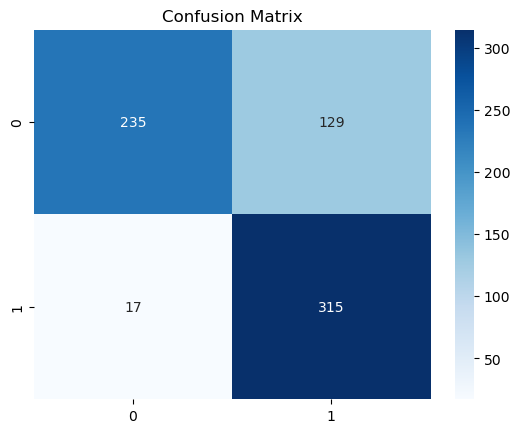

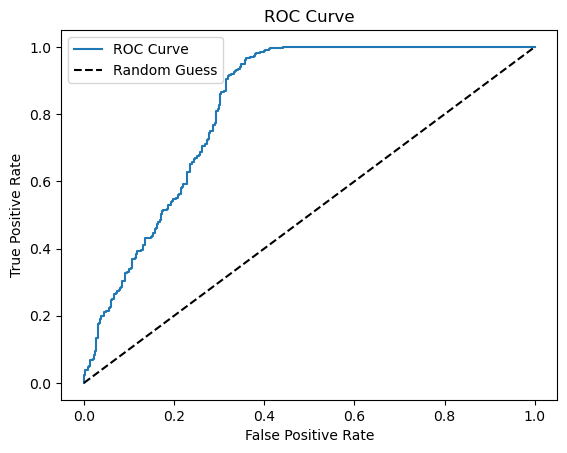

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
 # Replace with your file path

# Separate features (X) and target (y)
X = xy_train.drop(columns=['Fraudster', 'AccountID'])  # Drop non-feature columns
y = xy_train['Fraudster']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

Before SMOTE: Fraudster
0    7458
1    1390
Name: count, dtype: int64
After SMOTE: Fraudster
0    7458
1    7458
Name: count, dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model on the SMOTE-enhanced data
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[1238  627]
 [  24  324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.66      0.79      1865
           1       0.34      0.93      0.50       348

    accuracy                           0.71      2213
   macro avg       0.66      0.80      0.65      2213
weighted avg       0.88      0.71      0.75      2213

ROC-AUC Score: 0.7974207266340021


In [18]:
# Train the model on the original data
model_orig = LogisticRegression(random_state=42)
model_orig.fit(X_train, y_train)

# Evaluate the model
y_pred_orig = model_orig.predict(X_test)
print("Confusion Matrix (Original):\n", confusion_matrix(y_test, y_pred_orig))
print("\nClassification Report (Original):\n", classification_report(y_test, y_pred_orig))
print("ROC-AUC Score (Original):", roc_auc_score(y_test, y_pred_orig))

Confusion Matrix (Original):
 [[1852   13]
 [ 329   19]]

Classification Report (Original):
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1865
           1       0.59      0.05      0.10       348

    accuracy                           0.85      2213
   macro avg       0.72      0.52      0.51      2213
weighted avg       0.81      0.85      0.79      2213

ROC-AUC Score (Original): 0.5238135958830236


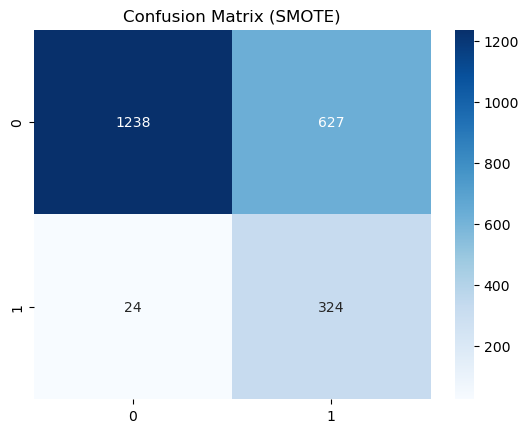

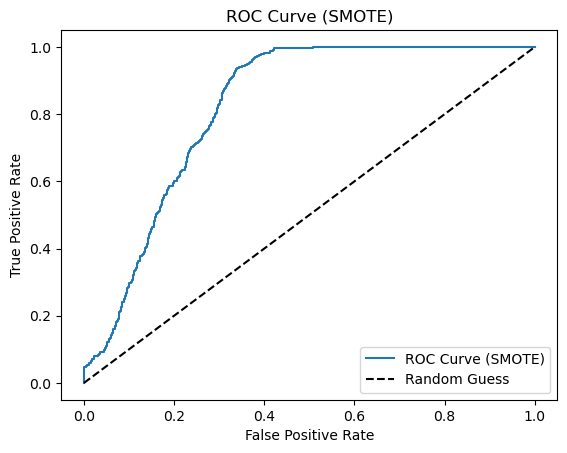

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SMOTE)')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve (SMOTE)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend()
plt.show()

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Oversample minority class to 50% of majority class
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Undersample majority class to 80% of minority class

# Create a pipeline
pipeline = Pipeline(steps=[('over', smote), ('under', under)])

# Apply the pipeline to the training data
X_train_hybrid, y_train_hybrid = pipeline.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print("Before Hybrid Sampling:", y_train.value_counts())
print("After Hybrid Sampling:", pd.Series(y_train_hybrid).value_counts())

Before Hybrid Sampling: Fraudster
0    7458
1    1390
Name: count, dtype: int64
After Hybrid Sampling: Fraudster
0    4661
1    3729
Name: count, dtype: int64


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model on the hybrid-sampled data
model.fit(X_train_hybrid, y_train_hybrid)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
 [[1290  575]
 [  47  301]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.81      1865
           1       0.34      0.86      0.49       348

    accuracy                           0.72      2213
   macro avg       0.65      0.78      0.65      2213
weighted avg       0.87      0.72      0.76      2213

ROC-AUC Score: 0.7783157683892639


In [22]:
# Train the model on the original data
model_orig = LogisticRegression(random_state=42)
model_orig.fit(X_train, y_train)

# Evaluate the model
y_pred_orig = model_orig.predict(X_test)
print("Confusion Matrix (Original):\n", confusion_matrix(y_test, y_pred_orig))
print("\nClassification Report (Original):\n", classification_report(y_test, y_pred_orig))
print("ROC-AUC Score (Original):", roc_auc_score(y_test, y_pred_orig))

Confusion Matrix (Original):
 [[1852   13]
 [ 329   19]]

Classification Report (Original):
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1865
           1       0.59      0.05      0.10       348

    accuracy                           0.85      2213
   macro avg       0.72      0.52      0.51      2213
weighted avg       0.81      0.85      0.79      2213

ROC-AUC Score (Original): 0.5238135958830236


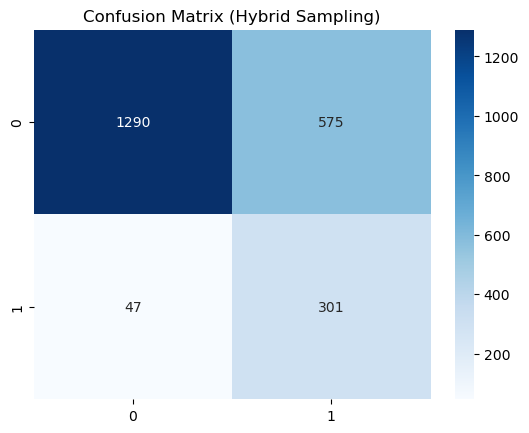

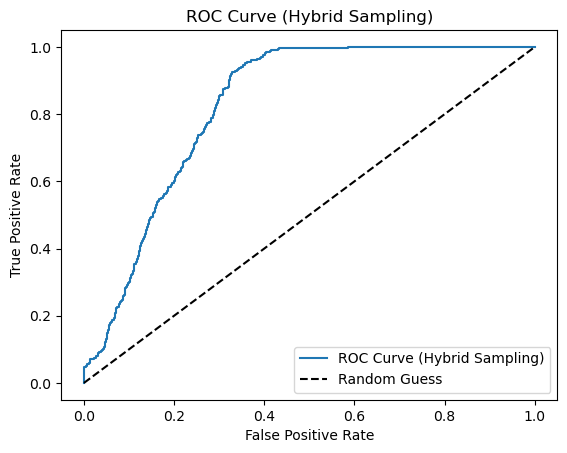

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Hybrid Sampling)')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve (Hybrid Sampling)')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Hybrid Sampling)')
plt.legend()
plt.show()